In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv("COMMODITY PRICE 2020-2025 RAW DATASET.csv")

In [3]:
df

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_Price,Max_Price,Modal_Price,Commodity_Code
0,Maharashtra,Nagpur,Bhiwapur,Soyabean,Yellow,FAQ,24-07-2024,3800,4325,4062,13
1,Maharashtra,Nagpur,Bhiwapur,Chili Red,Other,FAQ,05-07-2024,5000,10000,7500,26
2,Maharashtra,Nagpur,Bhiwapur,Soyabean,Yellow,FAQ,26-06-2024,3900,4500,4200,13
3,Maharashtra,Nagpur,Bhiwapur,Wheat,Other,FAQ,05-06-2024,2200,2200,2200,1
4,Maharashtra,Nagpur,Bhiwapur,Corriander seed,Other,FAQ,07-05-2020,4600,4600,4600,108
...,...,...,...,...,...,...,...,...,...,...,...
120545,Maharashtra,Nagpur,Umared,Rice,Other,FAQ,09-11-2024,3850,6000,5500,3
120546,Maharashtra,Nagpur,Umared,Soyabean,Yellow,FAQ,07-11-2024,3500,4320,4100,13
120547,Maharashtra,Nagpur,Umared,Soyabean,Yellow,FAQ,14-11-2024,3500,4250,4050,13
120548,Maharashtra,Nagpur,Umared,Soyabean,Yellow,FAQ,19-11-2024,3300,4280,4050,13


In [4]:
# Data Cleaning
df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'], format='%d-%m-%Y', errors='coerce')
df[['Min_Price', 'Max_Price', 'Modal_Price']] = df[['Min_Price', 'Max_Price', 'Modal_Price']].apply(pd.to_numeric, errors='coerce')

In [5]:
# Drop rows with missing data (optional)
df.dropna(inplace=True)

In [6]:
# Extract year and month for analysis
df['Year'] = df['Arrival_Date'].dt.year
df['Month'] = df['Arrival_Date'].dt.month_name()

In [ ]:
# 1. Descriptive summary
print("Number of unique commodities:", df['Commodity'].nunique())
print("Number of states:", df['State'].nunique())
print("Date range:", df['Arrival_Date'].min(), "to", df['Arrival_Date'].max())

Number of unique commodities: 84
Number of states: 1
Date range: 2020-01-01 00:00:00 to 2025-01-01 00:00:00


In [7]:
# 2. Top 10 commodities by frequency
top_commodities = df['Commodity'].value_counts().head(10)
print("\nTop 10 Commodities by Frequency:\n", top_commodities)


Top 10 Commodities by Frequency:
 Commodity
Tomato                   6820
Brinjal                  5636
Bhindi(Ladies Finger)    5411
Coriander(Leaves)        5408
Green Chilli             5327
Spinach                  5202
Cotton                   5085
Cauliflower              4810
Wheat                    4662
Cabbage                  4659
Name: count, dtype: int64


In [8]:
# 3. Yearly average modal price for top commodities
yearly_avg = df[df['Commodity'].isin(top_commodities.index)].groupby(['Year', 'Commodity'])['Modal_Price'].mean().reset_index()

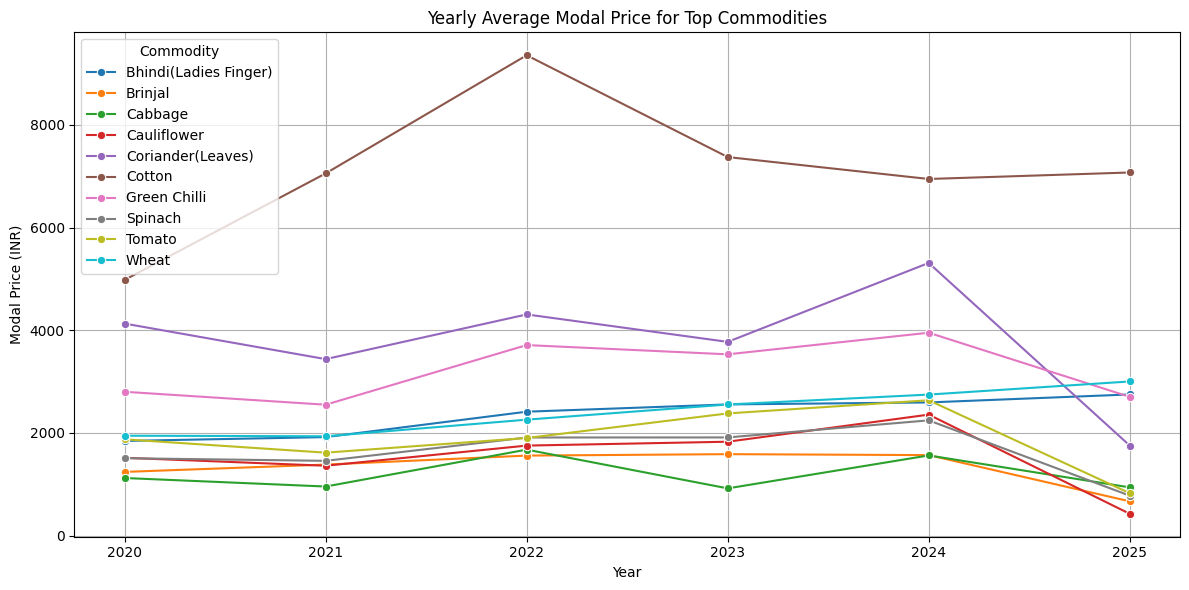

In [9]:
# Plot: Yearly average modal price for top commodities
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_avg, x='Year', y='Modal_Price', hue='Commodity', marker='o')
plt.title('Yearly Average Modal Price for Top Commodities')
plt.ylabel('Modal Price (INR)')
plt.grid(True)
plt.tight_layout()
plt.show()

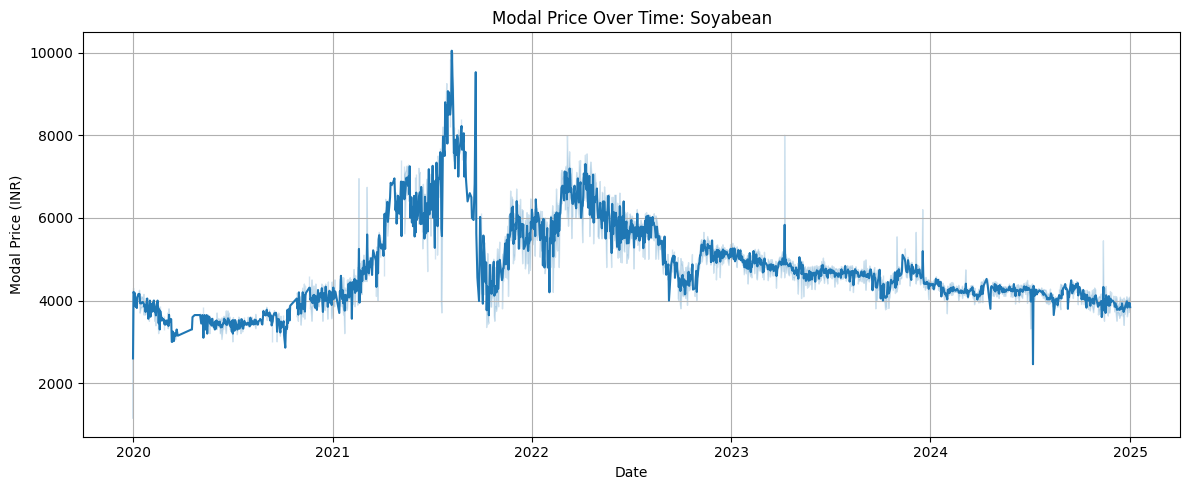

In [10]:
# 4. Line plot of modal price over time for a selected commodity
selected_commodity = 'Soyabean'  # change as needed
soy_data = df[df['Commodity'] == selected_commodity].sort_values('Arrival_Date')
plt.figure(figsize=(12, 5))
sns.lineplot(data=soy_data, x='Arrival_Date', y='Modal_Price')
plt.title(f'Modal Price Over Time: {selected_commodity}')
plt.ylabel('Modal Price (INR)')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Load the raw dataset
df = pd.read_csv("COMMODITY PRICE 2020-2025 RAW DATASET.csv")

# Step 1: Convert Arrival_Date to datetime
df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'], format='%d-%m-%Y', errors='coerce')

# Step 2: Convert price columns to numeric
price_cols = ['Min_Price', 'Max_Price', 'Modal_Price']
df[price_cols] = df[price_cols].apply(pd.to_numeric, errors='coerce')

# Step 3: Drop rows with missing Arrival_Date, Commodity, or Modal_Price
df_cleaned = df.dropna(subset=['Arrival_Date', 'Commodity', 'Modal_Price', 'State', 'District']).reset_index(drop=True)
df_cleaned.drop('District', axis=1, inplace=True)
df_cleaned.drop('State', axis=1, inplace=True)


# Step 4: Save cleaned dataset to CSV
df_cleaned.to_csv("Commodity_Cleaned_2020_2025.csv", index=False)

print("✅ Cleaned dataset saved as 'Commodity_Cleaned_2020_2025.csv'")

✅ Cleaned dataset saved as 'Commodity_Cleaned_2020_2025.csv'


In [ ]:
df_cleaned

,Market,Commodity,Variety,Grade,Arrival_Date,Min_Price,Max_Price,Modal_Price,Commodity_Code
0,Bhiwapur,Soyabean,Yellow,FAQ,2024-07-24,3800,4325,4062,13
1,Bhiwapur,Chili Red,Other,FAQ,2024-07-05,5000,10000,7500,26
2,Bhiwapur,Soyabean,Yellow,FAQ,2024-06-26,3900,4500,4200,13
3,Bhiwapur,Wheat,Other,FAQ,2024-06-05,2200,2200,2200,1
4,Bhiwapur,Corriander seed,Other,FAQ,2020-05-07,4600,4600,4600,108
...,...,...,...,...,...,...,...,...,...
120545,Umared,Rice,Other,FAQ,2024-11-09,3850,6000,5500,3
120546,Umared,Soyabean,Yellow,FAQ,2024-11-07,3500,4320,4100,13
120547,Umared,Soyabean,Yellow,FAQ,2024-11-14,3500,4250,4050,13
120548,Umared,Soyabean,Yellow,FAQ,2024-11-19,3300,4280,4050,13


/tmp/ipython-input-3002714725.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top5['Month_Year'] = df_top5['Arrival_Date'].dt.to_period('M').astype(str)


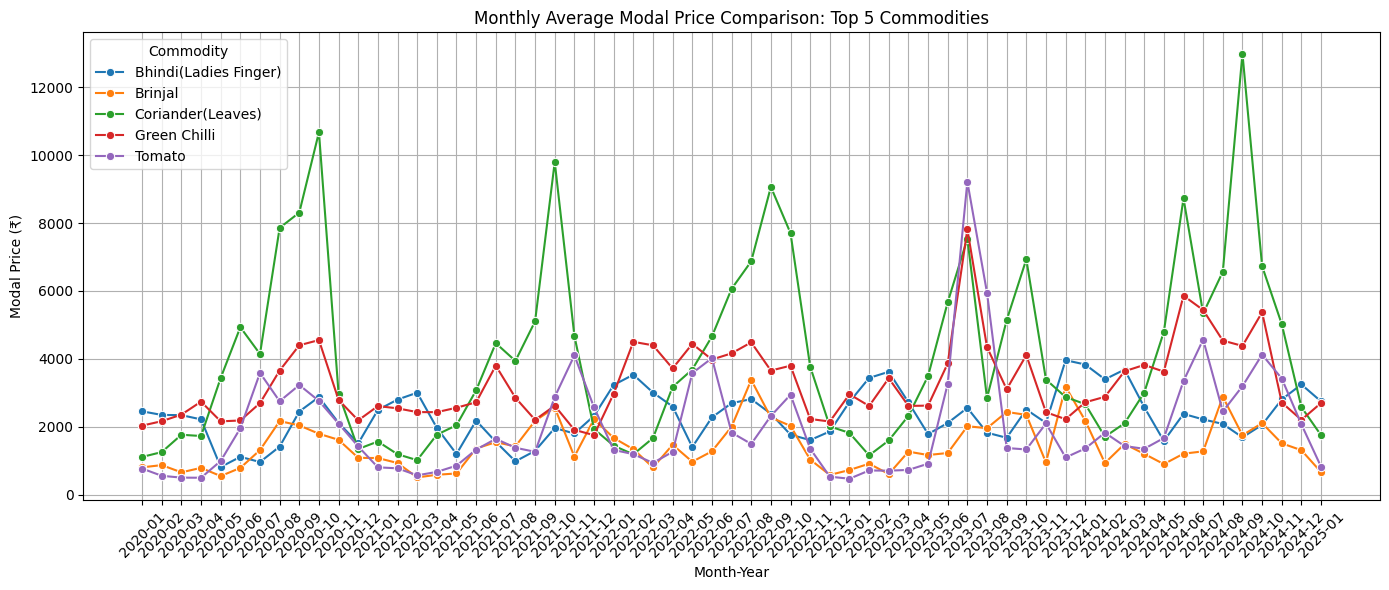

In [ ]:
# Filter top 5 commodities by frequency
top5_commodities = df['Commodity'].value_counts().head(5).index
df_top5 = df[df['Commodity'].isin(top5_commodities)]


df_top5['Month_Year'] = df_top5['Arrival_Date'].dt.to_period('M').astype(str)
monthly_avg_multi = df_top5.groupby(['Month_Year', 'Commodity'])['Modal_Price'].mean().reset_index()

# Line plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_avg_multi, x='Month_Year', y='Modal_Price', hue='Commodity', marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Average Modal Price Comparison: Top 5 Commodities")
plt.ylabel("Modal Price (₹)")
plt.xlabel("Month-Year")
plt.grid(True)
plt.tight_layout()
plt.show()

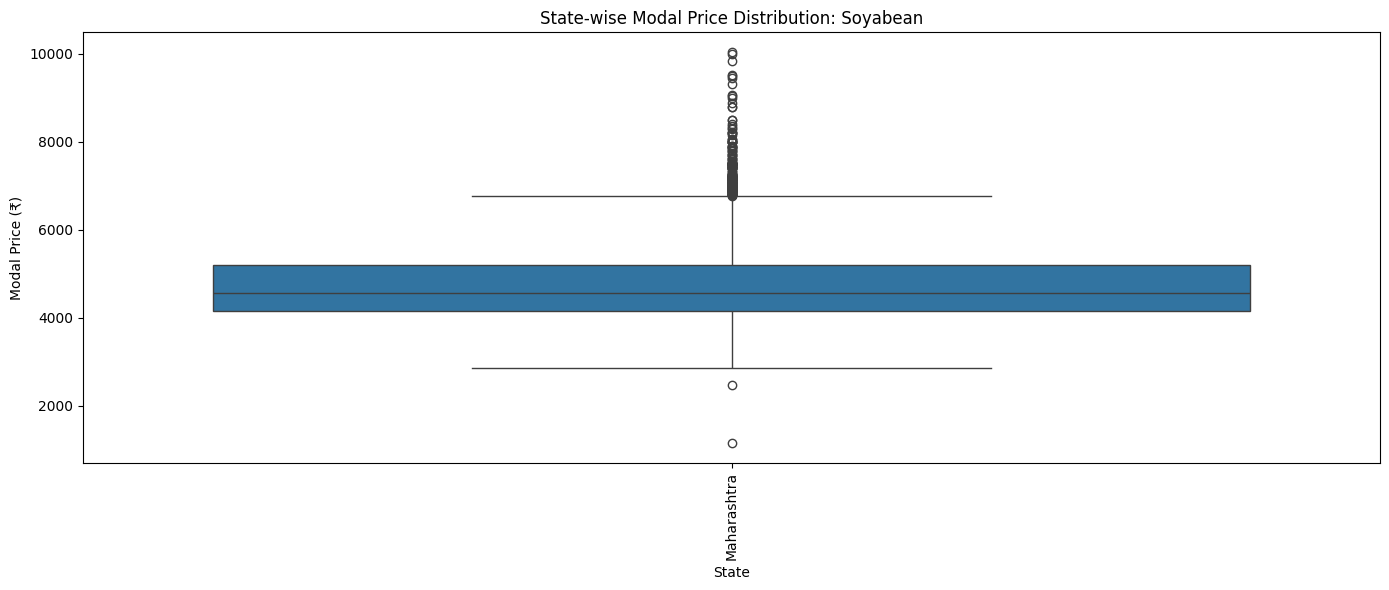

In [ ]:
# Choose a commodity
selected_commodity = "Soyabean"  # You can change this
state_data = df[df['Commodity'] == selected_commodity]

# Box plot by state
plt.figure(figsize=(14, 6))
sns.boxplot(data=state_data, x='State', y='Modal_Price')
plt.title(f"State-wise Modal Price Distribution: {selected_commodity}")
plt.ylabel("Modal Price (₹)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

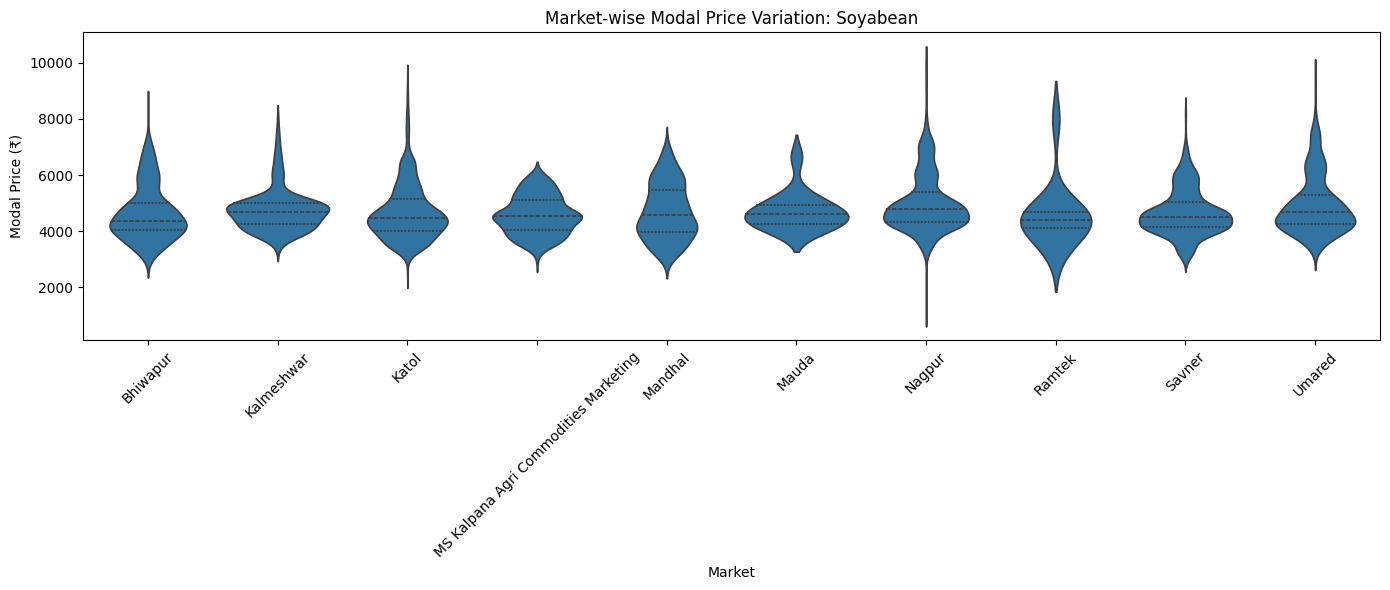

In [ ]:
# Pick a popular state or filter top markets
market_data = df[df['Commodity'] == selected_commodity]
top_markets = market_data['Market'].value_counts().head(10).index
market_data = market_data[market_data['Market'].isin(top_markets)]

# Violin plot
plt.figure(figsize=(14, 6))
sns.violinplot(data=market_data, x='Market', y='Modal_Price', inner='quartile')
plt.title(f"Market-wise Modal Price Variation: {selected_commodity}")
plt.ylabel("Modal Price (₹)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv("Commodity_Cleaned_2020_2025.csv")
df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'], errors='coerce')
df['Year'] = df['Arrival_Date'].dt.year

# Step 1: Pivot table - Commodity vs Yearly Average Modal Price
pivot = df.pivot_table(index='Commodity', columns='Year', values='Modal_Price', aggfunc='mean').fillna(0)

# Step 2: Normalize data
scaler = StandardScaler()
pivot_scaled = scaler.fit_transform(pivot)

# Step 3: Use Elbow Method (optional) to find optimal clusters
# inertias = []
# for k in range(1, 11):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(pivot_scaled)
#     inertias.append(kmeans.inertia_)
# plt.plot(range(1, 11), inertias, marker='o')
# plt.title('Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('Inertia')
# plt.show()

# Step 4: Fit KMeans
kmeans = KMeans(n_clusters=4, random_state=42)  # You can change cluster count
pivot['Cluster'] = kmeans.fit_predict(pivot_scaled)

# Step 5: Save clustered commodities
pivot.reset_index(inplace=True)
pivot.to_excel("Commodity_Clusters.xlsx", index=False)

print("✅ Commodity clustering complete. File saved as 'Commodity_Clusters.xlsx'")


✅ Commodity clustering complete. File saved as 'Commodity_Clusters.xlsx'


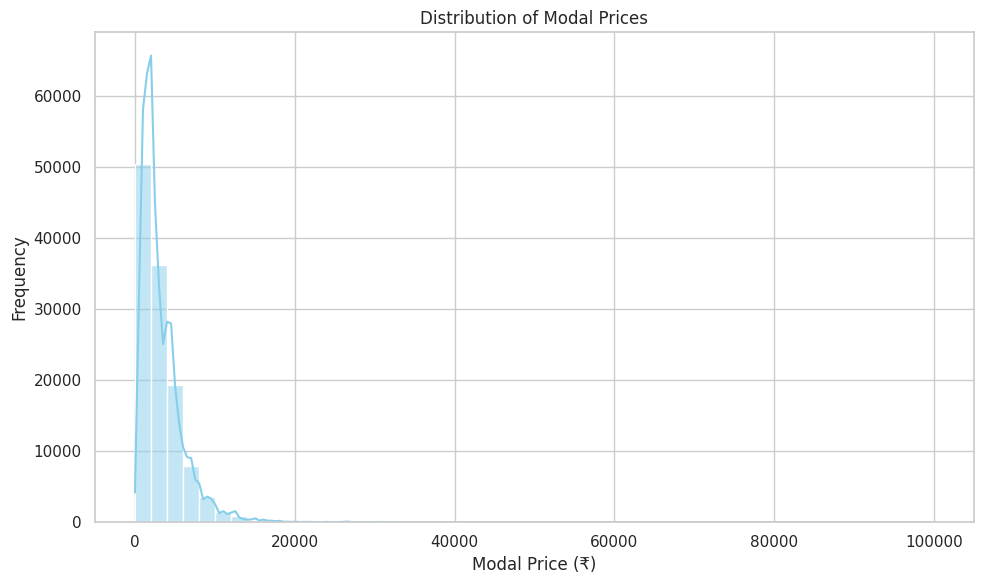

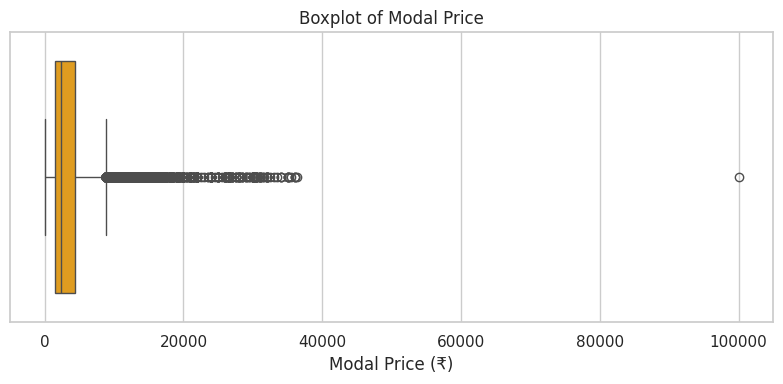

/tmp/ipython-input-1346125703.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_commodities.values, y=top_commodities.index, palette="viridis")


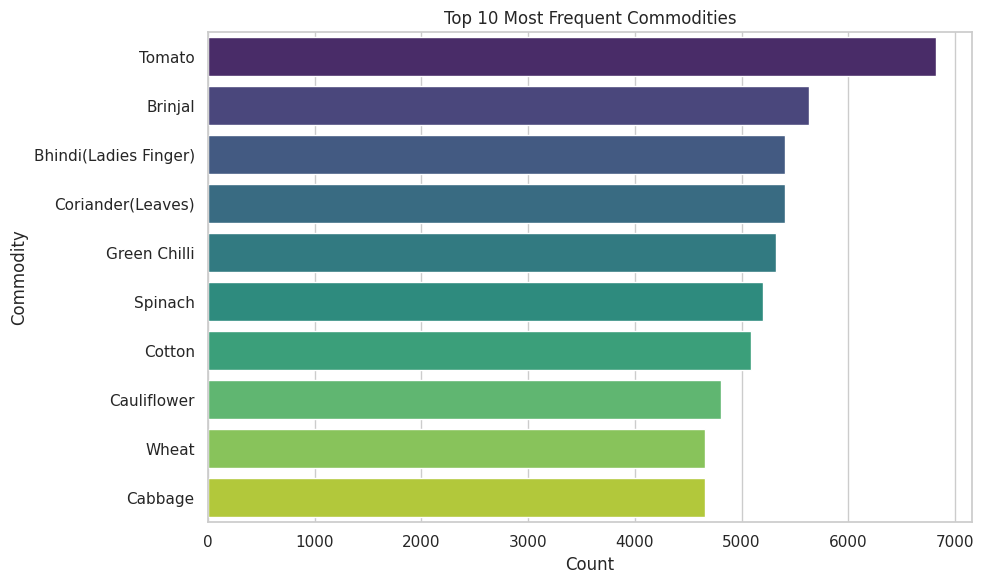

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv("Commodity_Cleaned_2020_2025.csv")

# Set seaborn style
sns.set(style="whitegrid")

# --------------------------------------------
# Univariate for numerical column: Modal_Price
# --------------------------------------------
plt.figure(figsize=(10, 6))
sns.histplot(df['Modal_Price'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Modal Prices")
plt.xlabel("Modal Price (₹)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("Univariate_ModalPrice_Histogram.png")
plt.show()

# Box plot to detect outliers in Modal Price
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Modal_Price'], color='orange')
plt.title("Boxplot of Modal Price")
plt.xlabel("Modal Price (₹)")
plt.tight_layout()
plt.savefig("Univariate_ModalPrice_Boxplot.png")
plt.show()

# --------------------------------------------
# Univariate for categorical column: Commodity
# --------------------------------------------
top_commodities = df['Commodity'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_commodities.values, y=top_commodities.index, palette="viridis")
plt.title("Top 10 Most Frequent Commodities")
plt.xlabel("Count")
plt.ylabel("Commodity")
plt.tight_layout()
plt.savefig("Univariate_Top_Commodities.png")
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to 'Market' and 'Commodity' columns
df_cleaned['Market_Encoded'] = label_encoder.fit_transform(df_cleaned['Market'])
df_cleaned['Commodity_Encoded'] = label_encoder.fit_transform(df_cleaned['Commodity'])

# Display the updated DataFrame with new encoded columns
display(df_cleaned.head())

,Market,Commodity,Variety,Grade,Arrival_Date,Min_Price,Max_Price,Modal_Price,Commodity_Code,Market_Encoded,Commodity_Encoded
0,Bhiwapur,Soyabean,Yellow,FAQ,2024-07-24,3800,4325,4062,13,0,74
1,Bhiwapur,Chili Red,Other,FAQ,2024-07-05,5000,10000,7500,26,0,17
2,Bhiwapur,Soyabean,Yellow,FAQ,2024-06-26,3900,4500,4200,13,0,74
3,Bhiwapur,Wheat,Other,FAQ,2024-06-05,2200,2200,2200,1,0,83
4,Bhiwapur,Corriander seed,Other,FAQ,2020-05-07,4600,4600,4600,108,0,21


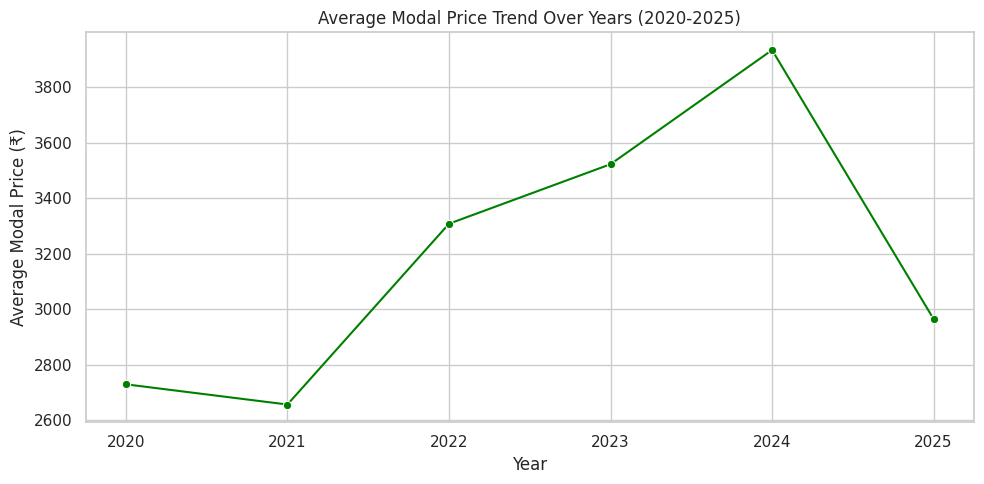

In [ ]:
df['Year'] = pd.to_datetime(df['Arrival_Date']).dt.year

trend_data = df.groupby(['Year'])['Modal_Price'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=trend_data.index, y=trend_data.values, marker='o', color='green')
plt.title("Average Modal Price Trend Over Years (2020-2025)")
plt.xlabel("Year")
plt.ylabel("Average Modal Price (₹)")
plt.tight_layout()
plt.savefig("Price_Trend_Over_Years.png")
plt.show()

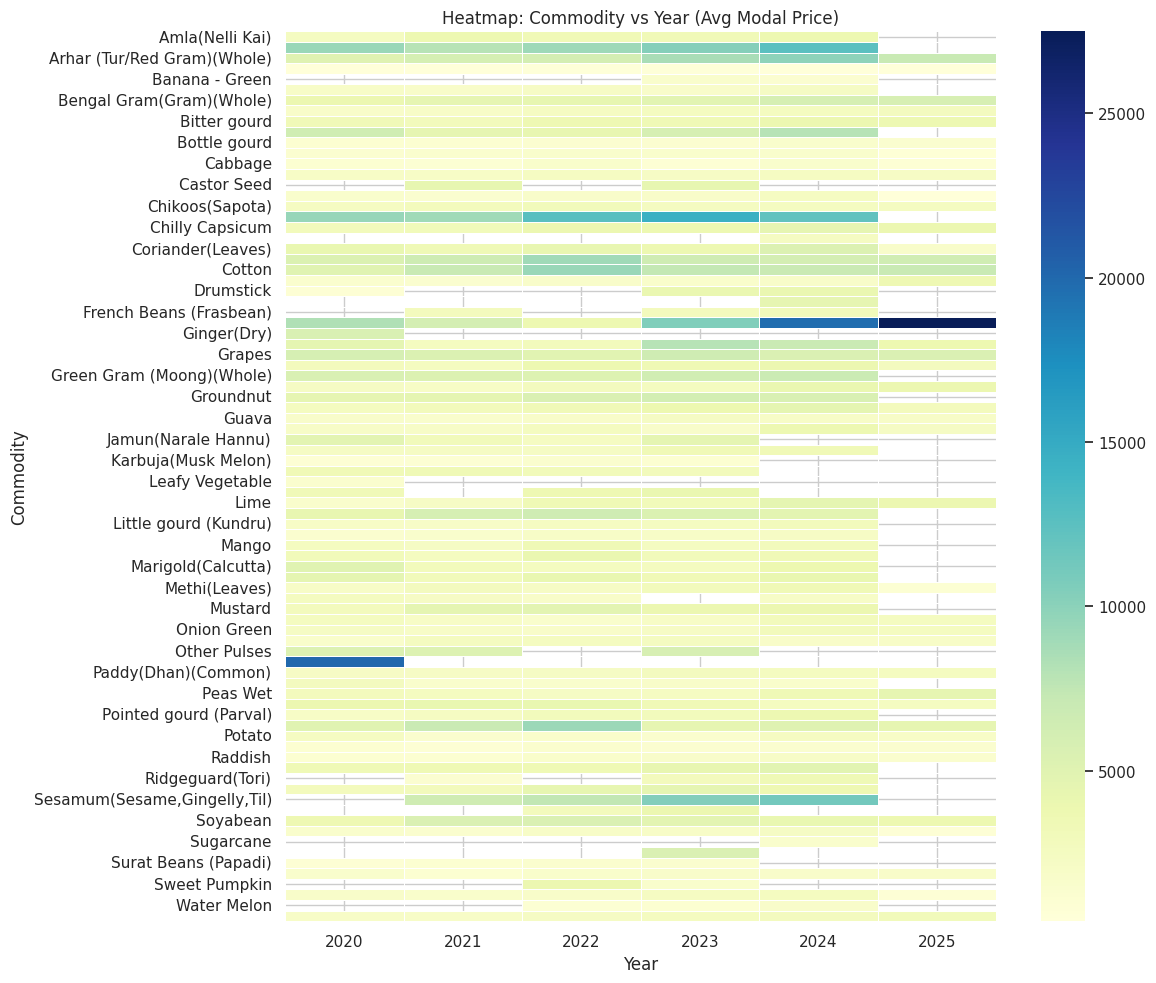

In [ ]:
pivot = df.pivot_table(index='Commodity', columns='Year', values='Modal_Price', aggfunc='mean')
plt.figure(figsize=(12, 10))
sns.heatmap(pivot, cmap='YlGnBu', linewidths=0.5)
plt.title("Heatmap: Commodity vs Year (Avg Modal Price)")
plt.xlabel("Year")
plt.ylabel("Commodity")
plt.tight_layout()
plt.savefig("Heatmap_Commodity_Year.png")
plt.show()

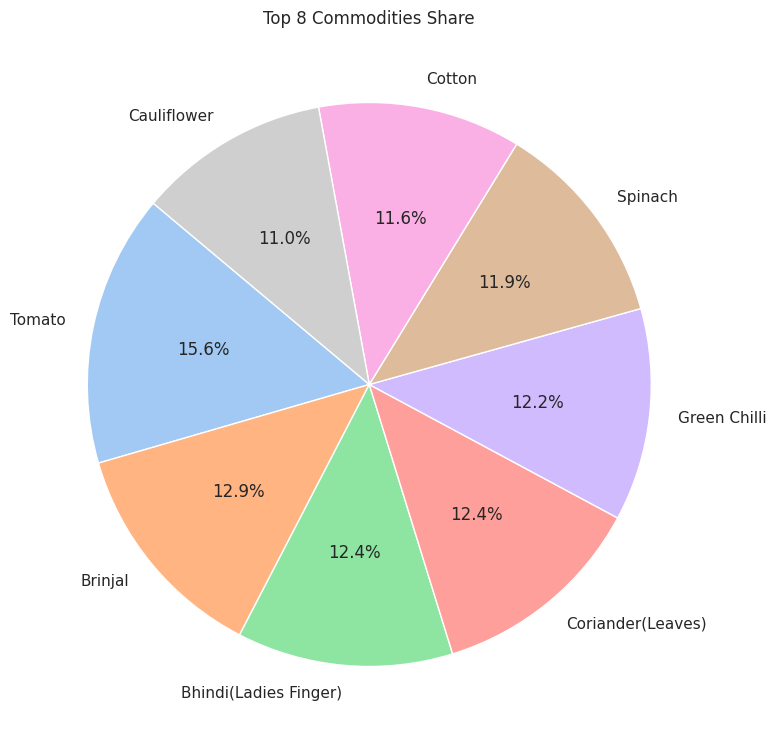

In [ ]:
top_commodities = df['Commodity'].value_counts().head(8)
plt.figure(figsize=(8, 8))
plt.pie(top_commodities.values, labels=top_commodities.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Top 8 Commodities Share")
plt.tight_layout()
plt.savefig("Pie_Commodity_Share.png")
plt.show()

Simple LR → Intercept: 3275.8486032028363
Simple LR → Coefficient: 1.30008135217421e-05
Simple LR → MSE: 7401432.648750068
Simple LR → R²: 2.247219908269038e-05


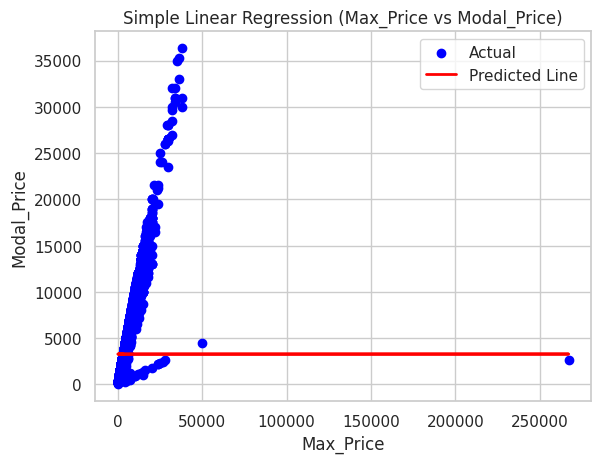

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset (update with actual path)
df = pd.read_csv("Commodity_Cleaned_2020_2025.csv")

# Simple Linear Regression: Predict Modal_Price using Max_Price
X = df[["Max_Price"]]   # Independent variable
y = df["Modal_Price"]   # Dependent variable

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
slr_model = LinearRegression()
slr_model.fit(X_train, y_train)

# Predictions
y_pred = slr_model.predict(X_test)

# Model parameters
print("Simple LR → Intercept:", slr_model.intercept_)
print("Simple LR → Coefficient:", slr_model.coef_[0])

# Performance
print("Simple LR → MSE:", mean_squared_error(y_test, y_pred))
print("Simple LR → R²:", r2_score(y_test, y_pred))

# Visualization
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Predicted Line")
plt.xlabel("Max_Price")
plt.ylabel("Modal_Price")
plt.title("Simple Linear Regression (Max_Price vs Modal_Price)")
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("Commodity_Cleaned_2020_2025.csv")

# Independent variables (features)
X = df[["Min_Price", "Max_Price"]]

# Dependent variable (target)
y = df["Modal_Price"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

# Make predictions
y_pred = mlr_model.predict(X_test)

# Model parameters
print("Intercept:", mlr_model.intercept_)
print("Coefficients:", mlr_model.coef_)   # [b1 for Min_Price, b2 for Max_Price]

# Performance metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Compare actual vs predicted
results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print("\nSample Comparison:\n", results.head())


Intercept: 303.60796663135807
Coefficients: [1.07230590e+00 8.71746252e-07]
Mean Squared Error: 599694.5980480022
R² Score: 0.9189776966094695

Sample Comparison:
        Actual    Predicted
21748     240   464.454113
38144    3000  2984.375765
37029    1600  1804.837794
35937    2800  2984.375329
63104    1175  1375.914911


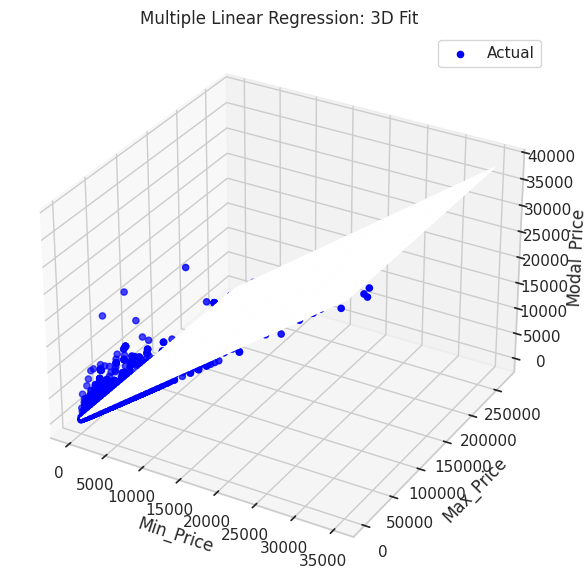

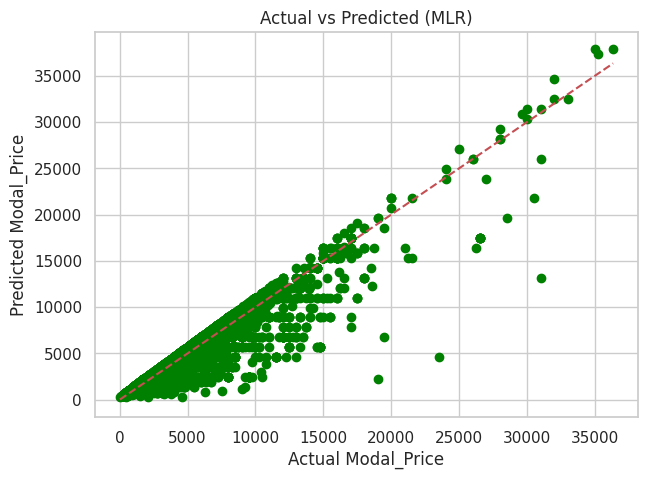

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("Commodity_Cleaned_2020_2025.csv")

# Independent variables
X = df[["Min_Price", "Max_Price"]]
y = df["Modal_Price"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

# Predictions
y_pred = mlr_model.predict(X_test)

# ----------- VISUAL 1: 3D Scatter with Regression Plane -----------
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

# Scatter actual data
ax.scatter(X_test["Min_Price"], X_test["Max_Price"], y_test, color="blue", label="Actual")

# Create meshgrid for regression plane
x_surf, y_surf = np.meshgrid(
    np.linspace(X_test["Min_Price"].min(), X_test["Min_Price"].max(), 50),
    np.linspace(X_test["Max_Price"].min(), X_test["Max_Price"].max(), 50)
)
z_surf = mlr_model.intercept_ + mlr_model.coef_[0]*x_surf + mlr_model.coef_[1]*y_surf

# Plot regression plane
ax.plot_surface(x_surf, y_surf, z_surf, color="red", alpha=0.5)

ax.set_xlabel("Min_Price")
ax.set_ylabel("Max_Price")
ax.set_zlabel("Modal_Price")
ax.set_title("Multiple Linear Regression: 3D Fit")
plt.legend()
plt.show()

# ----------- VISUAL 2: Actual vs Predicted -----------
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Modal_Price")
plt.ylabel("Predicted Modal_Price")
plt.title("Actual vs Predicted (MLR)")
plt.show()


Intercept: 3275.8486032028363
Coefficient: 1.30008135217421e-05
Mean Squared Error: 7401432.648750068
R² Score: 2.247219908269038e-05


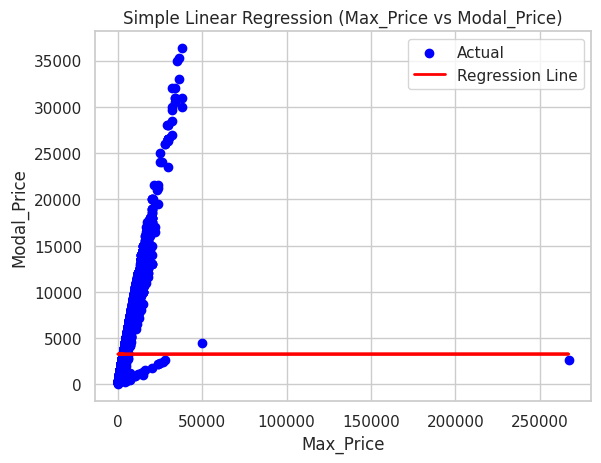

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("Commodity_Cleaned_2020_2025.csv")

# Independent variable (most relevant: Max_Price)
X = df[["Max_Price"]]
y = df["Modal_Price"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
slr_model = LinearRegression()
slr_model.fit(X_train, y_train)

# Predictions
y_pred = slr_model.predict(X_test)

# Model parameters
print("Intercept:", slr_model.intercept_)
print("Coefficient:", slr_model.coef_[0])

# Performance
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Visualization
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Max_Price")
plt.ylabel("Modal_Price")
plt.title("Simple Linear Regression (Max_Price vs Modal_Price)")
plt.legend()
plt.show()


In [ ]:
print(df.columns)

Index(['Market', 'Commodity', 'Variety', 'Grade', 'Arrival_Date', 'Min_Price',
       'Max_Price', 'Modal_Price', 'Commodity_Code'],
      dtype='object')


/tmp/ipython-input-1711883983.py:66: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.savefig("Commodity_Clustering_Visualization_Final.png", dpi=300)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


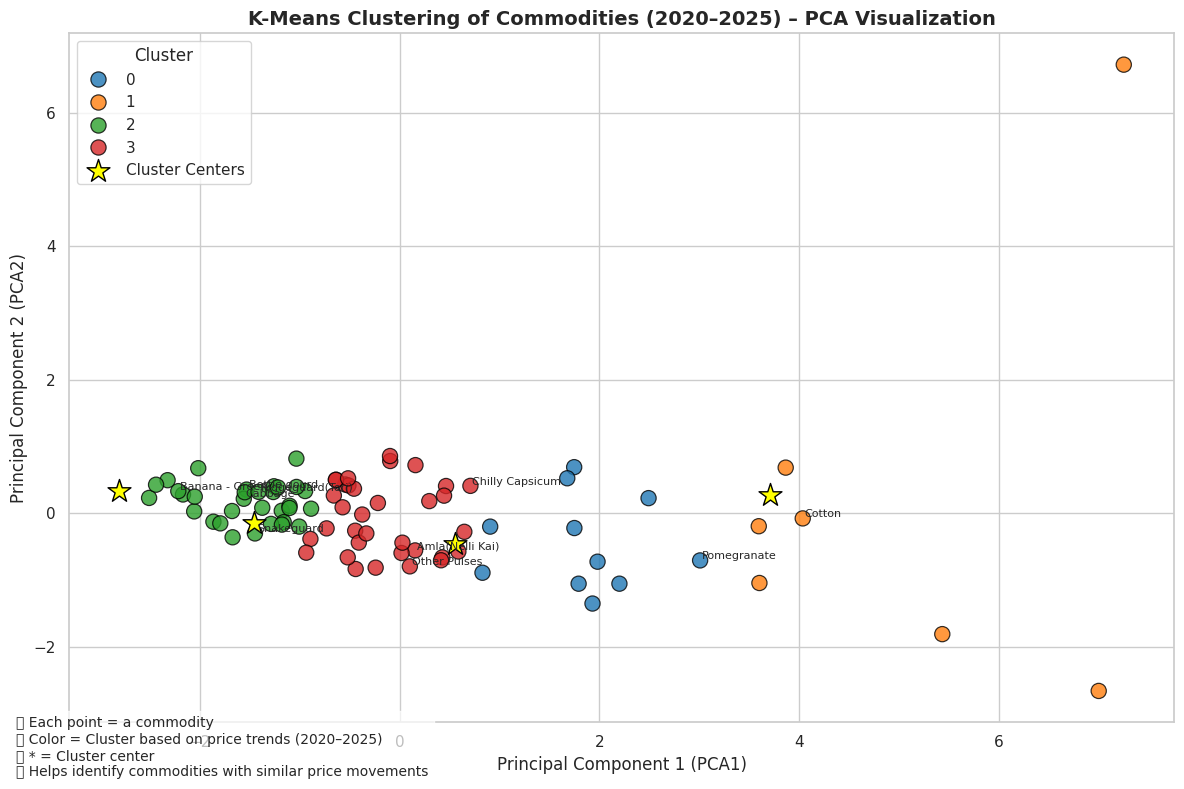

✅ Visualization saved as 'Commodity_Clustering_Visualization_Final.png'
✅ Cluster table saved as 'Commodity_Cluster_Table_Final.xlsx'


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv("Commodity_Cleaned_2020_2025.csv")

# Convert date column and extract year (already exists but ensure consistency)
df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'], errors='coerce')
df['Year'] = df['Arrival_Date'].dt.year

# --- ✅ PIVOT TABLE: Commodity vs Yearly Average Modal Price ---
pivot = df.pivot_table(index='Commodity', columns='Year', values='Modal_Price', aggfunc='mean').fillna(0)

# --- ✅ STANDARDIZATION ---
scaler = StandardScaler()
pivot_scaled = scaler.fit_transform(pivot)

# --- ✅ K-MEANS CLUSTERING ---
kmeans = KMeans(n_clusters=4, random_state=42)
pivot['Cluster'] = kmeans.fit_predict(pivot_scaled)

# --- ✅ PCA FOR 2D VISUALIZATION ---
pca = PCA(n_components=2)
pca_result = pca.fit_transform(pivot_scaled)
pivot['PCA1'] = pca_result[:, 0]
pivot['PCA2'] = pca_result[:, 1]

# --- ✅ VISUALIZATION ---
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=pivot, x='PCA1', y='PCA2', hue='Cluster',
    palette='tab10', s=120, alpha=0.8, edgecolor='black'
)

# Add cluster centers
centers = kmeans.cluster_centers_
centers_2d = PCA(n_components=2).fit_transform(centers)
plt.scatter(centers_2d[:, 0], centers_2d[:, 1], s=300, c='yellow', marker='*', edgecolor='black', label='Cluster Centers')

# Annotate sample commodity names for clarity
for i, row in pivot.sample(10, random_state=42).iterrows():
    plt.text(row['PCA1'] + 0.02, row['PCA2'] + 0.02, row.name, fontsize=8)

# Add details box
textstr = (
    "🔹 Each point = a commodity\n"
    "🔹 Color = Cluster based on price trends (2020–2025)\n"
    "🔹 * = Cluster center\n"
    "🔹 Helps identify commodities with similar price movements"
)
plt.gcf().text(0.02, 0.02, textstr, fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

# Title and labels
plt.title("K-Means Clustering of Commodities (2020–2025) – PCA Visualization", fontsize=14, fontweight='bold')
plt.xlabel("Principal Component 1 (PCA1)")
plt.ylabel("Principal Component 2 (PCA2)")
plt.legend(title="Cluster", loc='best')
plt.grid(True)
plt.tight_layout()

# Save and show plot
plt.savefig("Commodity_Clustering_Visualization_Final.png", dpi=300)
plt.show()

# --- ✅ SAVE RESULTS ---
pivot.to_excel("Commodity_Cluster_Table_Final.xlsx")

print("✅ Visualization saved as 'Commodity_Clustering_Visualization_Final.png'")
print("✅ Cluster table saved as 'Commodity_Cluster_Table_Final.xlsx'")


📘 Logistic Regression Results:
Accuracy: 0.8747760302608003
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     20793
           1       0.86      0.71      0.78      9345

    accuracy                           0.87     30138
   macro avg       0.87      0.83      0.85     30138
weighted avg       0.87      0.87      0.87     30138


🌳 Random Forest Results:
Accuracy: 0.9987059526179574
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20793
           1       1.00      1.00      1.00      9345

    accuracy                           1.00     30138
   macro avg       1.00      1.00      1.00     30138
weighted avg       1.00      1.00      1.00     30138



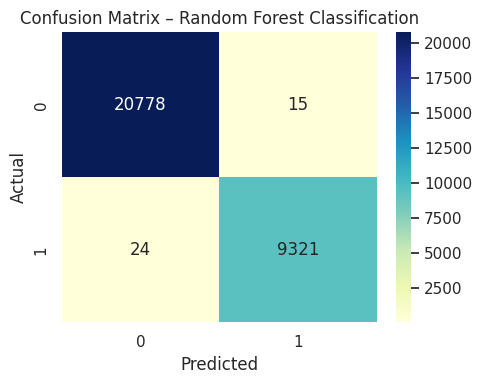

In [ ]:
# ---------------------------
# STEP 1: Import libraries
# ---------------------------
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------
# STEP 2: Load dataset
# ---------------------------
df = pd.read_csv("Commodity_Cleaned_2020_2025.csv")

# ---------------------------
# STEP 3: Feature Engineering
# ---------------------------
# Ensure date column is in datetime format
df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'], errors='coerce')

# ✅ Create 'Year' column safely
if 'Year' not in df.columns:
    df['Year'] = df['Arrival_Date'].dt.year

# Compute average modal price per commodity
avg_price = df.groupby('Commodity')['Modal_Price'].mean().reset_index()

# Create binary target column: 1 = High Price, 0 = Low Price
threshold = avg_price['Modal_Price'].mean()
avg_price['Price_Category'] = avg_price['Modal_Price'].apply(lambda x: 1 if x >= threshold else 0)

# Merge back with main dataset
df = df.merge(avg_price[['Commodity', 'Price_Category']], on='Commodity', how='left')

# ---------------------------
# STEP 4: Encode categorical features
# ---------------------------
label_cols = ['Commodity', 'Variety', 'Grade', 'Market']
encoder = LabelEncoder()
for col in label_cols:
    df[col] = encoder.fit_transform(df[col].astype(str))

# ---------------------------
# STEP 5: Prepare X and y
# ---------------------------
X = df[['Commodity', 'Variety', 'Grade', 'Market', 'Min_Price', 'Max_Price', 'Year']]
y = df['Price_Category']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------
# STEP 6: Train Models
# ---------------------------
# Logistic Regression
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# ---------------------------
# STEP 7: Evaluate Models
# ---------------------------
print("📘 Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

print("\n🌳 Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix – Random Forest Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("Classification_RF_ConfusionMatrix.png")
plt.show()
